<h1>Cours 2 : Analyse en Composantes Principales (TP 4-5)<span class="tocSkip"></span></h1> 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Première-Partie-(2H30)" data-toc-modified-id="Première-Partie-(2H30)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Première Partie (2H30)</a></span><ul class="toc-item"><li><span><a href="#Cours" data-toc-modified-id="Cours-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cours</a></span><ul class="toc-item"><li><span><a href="#Formulation-mathématique" data-toc-modified-id="Formulation-mathématique-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Formulation mathématique</a></span></li><li><span><a href="#Place-à-la-pratique-:-cas-simple" data-toc-modified-id="Place-à-la-pratique-:-cas-simple-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Place à la pratique : cas simple</a></span></li></ul></li><li><span><a href="#Exercice" data-toc-modified-id="Exercice-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exercice</a></span></li></ul></li><li><span><a href="#Deuxième-Partie-(2H30)" data-toc-modified-id="Deuxième-Partie-(2H30)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Deuxième Partie (2H30)</a></span><ul class="toc-item"><li><span><a href="#Cours" data-toc-modified-id="Cours-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cours</a></span><ul class="toc-item"><li><span><a href="#Récapitulatif-simplifié" data-toc-modified-id="Récapitulatif-simplifié-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Récapitulatif simplifié</a></span></li><li><span><a href="#Implémentation-de-l'ACP-:-cas-simple" data-toc-modified-id="Implémentation-de-l'ACP-:-cas-simple-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Implémentation de l'ACP : cas simple</a></span></li></ul></li><li><span><a href="#Exercice" data-toc-modified-id="Exercice-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exercice</a></span></li></ul></li></ul></div>

Nous allons décortiquer l'ACP que vous avez découvert au premier semestre. <br>
Pour cela, la première partie posera les principes mathématiques qui fondent l'ACP puis nous l'appliquerons sur un exemple très simple. <br>
Dans la deuxième partie, nous implémenterons cette ACP simplement avec le package numpy introduit dans le cours précédent. <br>
Il n'y aura qu'un seul exercice par partie, il sera sur un jeu de données identique, le but est de reproduire le même résultat avec l'ACP entre un package déjà intégré (scikit-learn) et notre propre implémentation. <br>


# Première Partie (2H30)

## Cours

Il est important de comprendre les fondements des algorithmes que l'on utilise pour plusieurs raisons :
- Déontologie professionnelle <br>
- Pouvoir l'expliquer à d'autres personnes <br>
- S'amuser avec l'algorithme, effectuer des améliorations, savoir repérer les erreurs et non-sens 

### Formulation mathématique

Notations : <br>

- X la matrice centrée des (observations) x (variables explicatives) de taille n x p, où n est le nombre d'observations et p le nombre de variables explicatives. <br>
- S la matrice de covariance de X, donc de taille p x p et symétrique. <br>

Supposons que p soit très grand et que nous voulons réduire la taille de cette matrice X tout en conservant le maximum d'information (#T). Comment faire ?

$\underline{\text{Théorème spectral.}}$ Toute matrice symétrique S peut se décomposer en valeur propres positives $(\lambda_1, ..,\lambda_p)$ et vecteurs propres $(\overrightarrow{v_1},..,\overrightarrow{v_p})$ tel que $\forall$ i $\in {1,..,p}$ :<br>

\begin{equation*}
S \overrightarrow{v_i} = \lambda_i \overrightarrow{v_i}
\end{equation*}

(#T)


Chaque valeur propre est toujours associée à un vecteur propre, ils marchent en couple. La valeur propre nous donne une idée de la quantité d'information que l'on peut récupérer avec le vecteur propre associé. <br>

Si l'on range les vecteurs propres de sorte que les valeurs propres associées soient décroissantes, on peut former une matrice de passage P composée des k "plus grands" vecteurs propres, permettant de réduire la dimension p de notre matrice initiale X tout en conservant le maximum de variance possible. Ainsi la nouvelle matrice de taille (n x k) que l'on dénote X' est le produit matriciel de X avec P. <br>
(#T)



### Place à la pratique : cas simple

Voici la matrice de variance-covariance estimée sur un dataset avec 100 observations et 3 variables. On souhaite réduire la dimension du dataset pour pouvoir le visualiser en 2 dimensions.

\begin{equation*}
S=\begin{pmatrix} 
2 & 0 & 0  \\
0 & 3 & 4 \\
0 & 4 & 9 
\end{pmatrix}
\end{equation*}

1) Trouver les valeurs propres de S. <br>
2) Calculer les pourcentages de variance expliqués par chacun des vecteurs propres $\Big(\frac{\lambda_i}{\sum \lambda_j}\Big)$. <br>
3) Trouver les vecteurs propres de S et les normaliser. <br>
4) Quelle est le maximum de pourcentage de variance expliquée que l'on peut atteindre en utilisant 2 facteurs ?  
5) Donner les nouvelles coordonnées dans $R^2$ des observations (2,4,3) et (-1,9,4) avec les 2 facteurs précédents.

## Exercice

- Charger les données de "data/decathlon_acp.csv" (Utiliser la fonction read_csv de pandas)
- Garder les noms des athlètes dans une variable "names".
- Enlever les variables : Name, Classement, Competition, Points
- Créer une fonction pour normaliser les données (Soustraire la moyenne et diviser par l'écart-type de chaque variable à chaque observation).
- Combien il y a-t-il d'observations et de variables ?
- Utiliser le package PCA de sklearn.decomposition pour réduire le dataset à 2 facteurs.
- Quel est la quantité de variance expliquée avec 2 facteurs.
- Proposer des explications à l'éloignement entre  Casarsa et Warners.
- Expliquer pourquoi Clay et Karpov sont proches.

In [2]:
import pandas as pd

In [5]:
dt=pd.read_csv("../data/decathlon_acp.csv",sep=";")

In [10]:
dt.shape[0]

28

In [16]:
dt["Name"].nunique()

28

In [17]:
len(dt["Name"].drop_duplicates())

28

In [18]:
names=dt.loc[:,"Name"]

In [21]:
data=dt.drop(["Name","Classement","Competition","Points"],axis=1)

In [27]:
import numpy as np

In [220]:
def standardize_fit_transform(dataset):
    dataf=dataset.copy()
    fitted_mean=np.mean(dataf,axis=0)
    fitted_std=np.std(dataf,axis=0) #ddof for the unbiased std
    numerateur=dataset-fitted_mean
    fitted_std=fitted_std.values.reshape(1,len(fitted_std))
    dataf=np.divide(dataset-fitted_mean,fitted_std)
    return dataf,fitted_mean,fitted_std

In [221]:
data_scaled,_,_=standardize_fit_transform(data)

In [222]:
data_scaled.head()

,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m
0,-0.289664,1.714344,2.063529,1.625467,-1.003534,-1.158385,1.340775,0.942595,2.368119,0.221202
1,-2.096912,2.072565,0.719559,0.946167,-0.337187,-0.974358,1.769771,0.590693,2.202345,0.400194
2,-1.832437,1.624789,1.552107,1.285817,-2.247916,-1.342412,2.245060,-0.465014,-0.697666,0.050305
3,-0.113347,0.609829,1.314236,1.965117,-0.513809,0.014788,1.223496,-1.168818,-0.100063,-1.091106
4,-1.303486,1.415827,-0.172456,-0.072782,-1.316637,-1.250399,-0.199287,0.590693,-0.728365,0.044909


In [242]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [225]:
ss=StandardScaler()
ss.fit_transform(data)
pca=PCA(2,random_state=26)
pca.fit(data_scaled)
data_pca=np.dot(data_scaled,pca.components_.T)

In [230]:
pca.singular_values_

array([9.96244972, 7.42689484])

In [232]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

0.5514613267468597

In [244]:
pca.explained_variance_ratio_

array([0.35446573, 0.1969956 ])

In [229]:
pca2=PCA(2,random_state=26)
pca2.fit(data_scaled)
pca2.transform(data_scaled)[:5]

array([[ 3.71379932,  1.53229496],
       [ 3.66942412,  0.86944254],
       [ 4.27778686,  0.42319201],
       [ 1.93986903,  1.36489411],
       [ 1.9332924 , -1.72825276]])

In [239]:
def circleOfCorrelations(pc_infos, ebouli):
    plt.Circle((0,0),radius=10, color='g', fill=False)
    circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
    fig = plt.gcf()
    fig.gca().add_artist(circle1)
    for idx in range(len(pc_infos["PC-0"])):
        x = pc_infos["PC-0"][idx]
        y = pc_infos["PC-1"][idx]
        plt.plot([0.0,x],[0.0,y],'k-')
        plt.plot(x, y, 'rx')
        plt.annotate(pc_infos.index[idx], xy=(x,y))
    plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
    plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.title("Circle of Correlations")
    plt.show()

In [240]:
coef=np.transpose(pca.components_)
ebouli=pd.Series(pca.explained_variance_ratio_)
cols=["PC-"+str(x) for x in range(len(ebouli))]
pc_infos=pd.DataFrame(coef,columns=cols,index=data_scaled.columns)

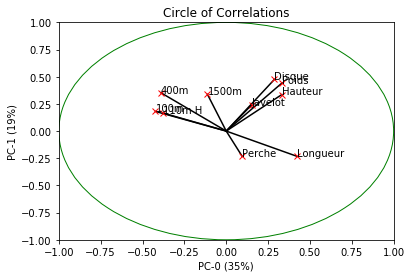

In [243]:
circleOfCorrelations(pc_infos,ebouli)

In [246]:
from adjustText import adjust_text

In [269]:
data.loc[[1,2],:]

,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m
1,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00
2,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11


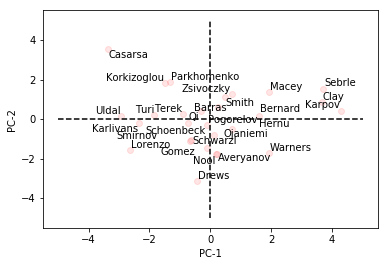

In [265]:
plt.plot(data_pca[:,0],data_pca[:,1], 'ro', alpha = 0.1)
plt.xlabel("PC-1")
plt.ylabel("PC-2")
texts = [plt.text(data_pca[i,0], data_pca[i,1], names[i]) for i in range(data_pca.shape[0])]
adjust_text(texts)
plt.plot([-5,5],[0,0],'k--')
plt.plot([0,0],[-5,5],'k--')
plt.show()

# Deuxième Partie (2H30)

## Cours

### Récapitulatif simplifié 

Comment faire une ACP ? 
- Centrer le dataset
- Calculer la matrice de variance-covariance
- Calculer les valeurs propres
- Calculer les vecteurs propres normées
- Créer la matrice de passage
- Choisir le nombre adéquat de facteurs
- Faire un produit matriciel pour obtenir la nouvelle matrice

### Implémentation de l'ACP : cas simple

In [1]:
import numpy as np

Partons du 1.1.2 et implémentons les étapes à partir du calcul des valeurs propres.

Définisons la matrice de variance-covariance S:

In [2]:
S = np.array([[2,0,0],[0,3,4],[0,4,9]])

In [3]:
#S_p = np.array([[2,0,0],[0,3,4]])

Calculons les valeurs propres et les vecteurs propres sur la matrice de variance covariance centrée S : 

In [4]:
val_prop,vec_prop=np.linalg.eig(S)
print("valeurs propres : {}, \n Vecteurs propres : {}".format(val_prop,vec_prop))

valeurs propres : [11.  1.  2.], 
 Vecteurs propres : [[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


In [24]:
val_prop

array([11.,  1.,  2.])

In [14]:
def pca_ranked(S,k):
    eig_val,eig_vec=np.linalg.eig(S)
    eig=[(eig_val[i],eig_vec[:,i]) for i in range(S.shape[0])]
    eig.sort(key=lambda x: x[0],reverse=True)
    k_eig=np.array([eig[i][0] for i in range(k)])
    k_eig_vec=np.column_stack(eig[i][1] for i in range(k))
    return k_eig_vec

Retrouve-t-on les mêmes vecteurs propres que calculer précedement ?

Ecrivez une fonction qui donne les coordonnées dans $R^2$ des observations (2,4,3) et (-1,9,4) avec les 2 "meilleurs" facteurs.

In [15]:
pca_ranked(S,k=2)

array([[0.        , 1.        ],
       [0.4472136 , 0.        ],
       [0.89442719, 0.        ]])

In [ ]:
sorted()

In [72]:
tst=[(11,[2,3,5]),(1,[3,4,2]),(2,[2,4,1])]

In [73]:
tst.sort(reverse=True)

In [74]:
tst

[(11, [2, 3, 5]), (2, [2, 4, 1]), (1, [3, 4, 2])]

In [64]:
P=np.array([tst[0][1],tst[1][1]])

In [67]:
np.dot(X,P.T)

array([[31, 23],
       [45, 38]])

In [30]:
sorted(tst,reverse=True)

[(11, [2, 3, 5]), (2, [2, 4, 1]), (1, [3, 4, 2])]

In [197]:
def new_coord(S,X,k):
    val,vec=np.linalg.eig(S)
    tst=[(val[i],vec[:,i]) for i in range(X.shape[1])]
    tst.sort(reverse=True)
    #P_f=np.zeros(shape=(X.shape[1],k))
    #for i in range(k):
    #    P_f[:,i]=tst[i][1]
    P=np.array([tst[:k][i][1] for i in range(k)])
    P_f=P.T
    print(P_f)
    X_prime = np.dot(X,P_f)
    if X_prime.shape[1]==k:
        return X_prime
    else:
        print("problème")

In [153]:
X=np.array([[2,4,3],[-1,9,4]])

In [19]:
new_coord(S,X,2)

array([[ 4.47213595,  2.        ],
       [ 7.60263112, -1.        ]])

## Exercice

In [154]:
import pandas as pd

In [157]:
data=pd.read_csv("../data/decathlon_acp.csv",sep=";")

In [159]:
X=data.drop(["Name","Classement","Competition","Points"],axis=1)

In [161]:
def standardize_fit_transform(dataset):
    dataf=dataset.copy()
    fitted_mean=np.mean(dataf,axis=0)
    fitted_std=np.std(dataf,axis=0) #ddof for the unbiased std
    numerateur=dataset-fitted_mean
    fitted_std=fitted_std.values.reshape(1,len(fitted_std))
    dataf=np.divide(dataset-fitted_mean,fitted_std)
    return dataf,fitted_mean,fitted_std

In [198]:
def ACP(dataframe,k):
    df=dataframe.copy()
    df_stand,_,_=standardize_fit_transform(df)
    S=np.cov(df_stand.T)
    #print(S)
    return new_coord(S,df_stand,k)

In [181]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data_scaled=ss.fit_transform(X)
pca=PCA(2,random_state=26)
pca.fit(data_scaled)
data_pca=np.dot(data_scaled,pca.components_.T)

In [196]:
pca.components_

array([[-0.42270533,  0.42146649,  0.33407359,  0.33249211, -0.38995573,
        -0.37654258,  0.28793579,  0.09539301,  0.15213083, -0.11193576],
       [ 0.18068407, -0.23154081,  0.44373197,  0.33625299,  0.35243221,
         0.16558589,  0.4754243 , -0.23248607,  0.24151756,  0.33725668]])

In [218]:
np.cov(data_scaled.T,bias=0)

array([[ 1.03703704, -0.73107965, -0.38338809, -0.32073875,  0.65829574,
         0.56265267, -0.24195827, -0.27009843, -0.01212277,  0.06059864],
       [-0.73107965,  1.03703704,  0.20269019,  0.35846439, -0.69596712,
        -0.55809526,  0.25916512,  0.29563787,  0.09726583, -0.15288628],
       [-0.38338809,  0.20269019,  1.03703704,  0.63527053, -0.20668168,
        -0.25414653,  0.69043265,  0.02456962,  0.39754097,  0.13434174],
       [-0.32073875,  0.35846439,  0.63527053,  1.03703704, -0.1754242 ,
        -0.3380302 ,  0.53611008, -0.04395176,  0.21205462, -0.0036256 ],
       [ 0.65829574, -0.69596712, -0.20668168, -0.1754242 ,  1.03703704,
         0.53913529, -0.14952657, -0.11970333, -0.05667808,  0.57163939],
       [ 0.56265267, -0.55809526, -0.25414653, -0.3380302 ,  0.53913529,
         1.03703704, -0.22490447, -0.15656649, -0.08277594,  0.18567669],
       [-0.24195827,  0.25916512,  0.69043265,  0.53611008, -0.14952657,
        -0.22490447,  1.03703704, -0.19103414

In [215]:
pca.get_covariance()

array([[ 1.18207649, -0.61244651, -0.31981466, -0.34612752,  0.60315175,
         0.53626679, -0.25109468, -0.18617164, -0.13522009,  0.23547693],
       [-0.61244651,  1.20947931,  0.28555312,  0.31986052, -0.6278517 ,
        -0.54713062,  0.21465445,  0.20308571,  0.11668584, -0.26011476],
       [-0.31981466,  0.28555312,  1.21456364,  0.56178909, -0.17457893,
        -0.28188325,  0.60598039, -0.05215183,  0.31389679,  0.1029943 ],
       [-0.34612752,  0.31986052,  0.56178909,  1.08878292, -0.22802995,
        -0.30605042,  0.52989248, -0.01610018,  0.27521514,  0.05056643],
       [ 0.60315175, -0.6278517 , -0.17457893, -0.22802995,  1.23353387,
         0.53966964, -0.10257976, -0.2348596 , -0.05918018,  0.30878645],
       [ 0.53626679, -0.54713062, -0.28188325, -0.30605042,  0.53966964,
         1.06026267, -0.22045339, -0.16741472, -0.11881733,  0.21204503],
       [-0.25109468,  0.21465445,  0.60598039,  0.52989248, -0.10257976,
        -0.22045339,  1.16833035, -0.07653963

In [182]:
data_pca

array([[ 3.71379932,  1.53229496],
       [ 3.66942412,  0.86944254],
       [ 4.27778686,  0.42319201],
       [ 1.93986903,  1.36489411],
       [ 1.9332924 , -1.72825276],
       [ 0.7080513 ,  1.27035379],
       [ 0.70289641, -0.51612174],
       [ 0.18104342, -1.77402656],
       [ 1.60238001,  0.13630016],
       [-0.0941915 , -1.47771398],
       [ 0.26049508,  0.61625363],
       [-0.1233691 , -0.2925685 ],
       [-0.29134376,  0.38871467],
       [ 0.48322041,  1.12904532],
       [ 0.22230014, -1.74280295],
       [ 0.11807846, -0.79410706],
       [-0.6390413 , -1.065963  ],
       [-0.73939288, -0.18834377],
       [-0.42318527, -3.13453881],
       [-1.33571515,  1.85946013],
       [-0.90837579,  0.26341759],
       [-0.65569837, -1.09519201],
       [-1.83638255,  0.19607058],
       [-2.62528441, -1.56263237],
       [-2.35923352, -0.19037652],
       [-1.48441505,  1.82323607],
       [-2.93598042,  0.13250514],
       [-3.36102792,  3.55745932]])

In [199]:
ACP(X,2)

[[ 0.42270533 -0.18068407]
 [-0.42146649  0.23154081]
 [-0.33407359 -0.44373197]
 [-0.33249211 -0.33625299]
 [ 0.38995573 -0.35243221]
 [ 0.37654258 -0.16558589]
 [-0.28793579 -0.4754243 ]
 [-0.09539301  0.23248607]
 [-0.15213083 -0.24151756]
 [ 0.11193576 -0.33725668]]


array([[-3.71379932, -1.53229496],
       [-3.66942412, -0.86944254],
       [-4.27778686, -0.42319201],
       [-1.93986903, -1.36489411],
       [-1.9332924 ,  1.72825276],
       [-0.7080513 , -1.27035379],
       [-0.70289641,  0.51612174],
       [-0.18104342,  1.77402656],
       [-1.60238001, -0.13630016],
       [ 0.0941915 ,  1.47771398],
       [-0.26049508, -0.61625363],
       [ 0.1233691 ,  0.2925685 ],
       [ 0.29134376, -0.38871467],
       [-0.48322041, -1.12904532],
       [-0.22230014,  1.74280295],
       [-0.11807846,  0.79410706],
       [ 0.6390413 ,  1.065963  ],
       [ 0.73939288,  0.18834377],
       [ 0.42318527,  3.13453881],
       [ 1.33571515, -1.85946013],
       [ 0.90837579, -0.26341759],
       [ 0.65569837,  1.09519201],
       [ 1.83638255, -0.19607058],
       [ 2.62528441,  1.56263237],
       [ 2.35923352,  0.19037652],
       [ 1.48441505, -1.82323607],
       [ 2.93598042, -0.13250514],
       [ 3.36102792, -3.55745932]])

1) Implémentez une ACP sur le même jeu de données que la semaine dernière "decathlon_acp.csv". Vérifier que les résultats concordent. <br>

2) Plotez la perte de variance en enlevant successivement le plus "faible" vecteur propre. Quelle est selon vous le meilleur choix de dimension ?